# 利用MindQuantum解决组合优化问题

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
Looking in links: https://obs-workspace-20180810.obs.cn-north-1.myhuaweicloud.com/pypi/index.html
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [195]:
import networkx as nx

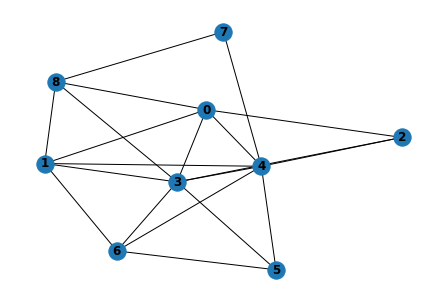

In [196]:
g = nx.gnm_random_graph(9, 20, seed=42)
nx.draw(g,with_labels=True, font_weight='bold')

In [197]:
print(list(g.edges))

[(0, 1), (0, 8), (0, 2), (0, 4), (0, 3), (1, 8), (1, 6), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (3, 8), (3, 6), (3, 5), (4, 7), (4, 5), (4, 6), (5, 6), (7, 8)]


## nx库中的解法

In [198]:
cut, partition = nx.algorithms.approximation.one_exchange(g)
print(cut, partition)

14 ({8, 3, 4}, {0, 1, 2, 5, 6, 7})


## Try to solve by yourself

In [199]:
def solution(edges):
    pass

In [200]:
my_cut = solution(list(g.edges))
print(f'I get {my_cut} cuts')

I get None cuts


## QAOA

In [201]:
from mindquantum import *

In [202]:
depth = 9
ansatz = MaxCutAnsatz(list(g.edges), depth)

ham = ansatz.hamiltonian
circuit = ansatz.circuit
circuit

Z(beta_7)─────ZZ(beta_7)────RX(alpha_7)───────────────────────┼───────────────────────ZZ(beta_8)───────────────────────┼─────────────┼───────────────────────ZZ(beta_8)───────────────────ZZ(beta_8)─────ZZ(beta_8)────────┼─────────────┼─────────────┼──────────ZZ(beta_8)────ZZ(beta_8)─────ZZ(beta_8)────RX(alpha_8)─────────────────
                             │                                                        │             │                                                                                     │             │             │              │             │              │                                           │                                                        │             │                                                                                     │             │             │              │             │              │                                           │                                                        │             │                                                                                     │             │             │              │             │              │                                           │                                                        │             │                                                                                     │             │             │              │             │              │                                           │                                                        │             │                                                                                     │             │             │              │             │              │                                           │                                                        │             │                                                                                     │             │             │              │             │              │                                           │                                                        │             │                                                                                     │             │             │              │             │              │                                           │                                                        │             │                                                                                     │             │             │              │             │              │                                           │                                                        │             │                                                                                     │             │             │              │             │              │
q5: ──H──────────────────────┼────────────────────────────────────────────────────────┼─────────────┼─────────────────────────────────────────────────────────────────────────────────────┼─────────────┼─────────ZZ(beta_0)─────────┼─────────ZZ(beta_0)─────────┼──────────ZZ(beta_0)────RX(alpha_0)────────┼────────────────────────────────────────────────────────┼─────────────┼─────────────────────────────────────────────────────────────────────────────────────┼─────────────┼─────────ZZ(beta_1)─────────┼─────────ZZ(beta_1)─────────┼──────────ZZ(beta_1)────RX(alpha_1)────────┼────────────────────────────────────────────────────────┼─────────────┼─────────────────────────────────────────────────────────────────────────────────────┼─────────────┼─────────ZZ(beta_2)─────────┼─────────ZZ(beta_2)─────────┼──────────ZZ(beta_2)────RX(alpha_2)────────┼────────────────────────────────────────────────────────┼─────────────┼─────────────────────────────────────────────────────────────────────────────────────┼─────────────┼─────────ZZ(beta_3)─────────┼─────────ZZ(beta_3)─────────┼──────────ZZ(beta_3)────RX(alpha_3)────────┼────────────────────────────────────────────────────────┼─────────────┼─────────────────────────────────

In [203]:
sim = Simulator('projectq', circuit.n_qubits)
grad_ops = sim.get_expectation_with_grad(Hamiltonian(-ham), circuit)

In [204]:
import numpy as np

grad_ops(np.random.random(size=len(circuit.params_name)))

(array([[-9.8626081-1.12051773e-17j]]),
 array([[[-0.52996266+0.j,  0.18264155+0.j, -2.22921426+0.j,
           0.13336456+0.j, -2.18406044+0.j, -0.18263808+0.j,
           0.69404988+0.j, -0.46228346+0.j,  1.31220538+0.j,
          -0.27094008+0.j, -0.3841281 +0.j,  0.08085535+0.j,
          -0.7389878 +0.j, -0.62143557+0.j, -2.68580568+0.j,
          -0.61829066+0.j, -1.30943014+0.j, -0.31617842+0.j]]]))

### 利用`scipy`的优化器进行优化

In [205]:
from scipy.optimize import minimize

def fun(x):
    f, g = grad_ops(x)
    print(f"Cut value: {-f.real[0, 0]}")
    return f.real[0, 0], g.real[0, 0]

np.random.seed(1)
x0 = np.random.random(len(circuit.params_name))
optimizers = ['cg', 'COBYLA', 'Powell', 'bfgs']
opti = optimizers[1]
tol = 1e-6
res = minimize(fun, x0, method=opti, jac=True, tol=tol)

37998
Cut value: 13.369529316224902
Cut value: 13.36834490538913
Cut value: 13.371003333531648
Cut value: 13.371014660698929
Cut value: 13.370570849115783
Cut value: 13.370611087806473
Cut value: 13.370985140710138
Cut value: 13.371744588553845
Cut value: 13.371819752641253
Cut value: 13.37038733989378
Cut value: 13.372134832208578
Cut value: 13.371051614030709
Cut value: 13.371482341449815
Cut value: 13.370730377724083
Cut value: 13.371917535993585
Cut value: 13.372229253660244
Cut value: 13.3719054046956
Cut value: 13.373447756400893
Cut value: 13.372857600764767
Cut value: 13.373250538893057
Cut value: 13.373754484612778
Cut value: 13.37370309042556
Cut value: 13.37229234496763
Cut value: 13.373507478594707
Cut value: 13.373058988810516
Cut value: 13.373335128212226
Cut value: 13.373991878532767
Cut value: 13.373913124906924
Cut value: 13.37426491242286
Cut value: 13.374270656686333
Cut value: 13.373139438199422
Cut value: 13.374482788557682
Cut value: 13.373715026648851
Cut value: 

In [206]:
def get_partitions(theta, first_n=1):
    s = Simulator('projectq', circuit.n_qubits)
    s.apply_circuit(circuit, dict(zip(circuit.params_name, theta)))
    state = s.get_qs()
    amp = np.abs(state)**2
    partitions=[]
    for n in range(first_n):
        poi = np.argmax(amp)
        amp[poi] = -1
        bin_string = bin(poi)[2:].zfill(circuit.n_qubits)[::-1]
        partition = [[], []]
        for i, j in enumerate(bin_string):
            partition[int(j)].append(i)
        partitions.append(partition)
    return partitions

def get_cut_value(graph, partitions):
    values = []
    for partition in partitions:
        value = 0
        for p0 in partition[0]:
            for p1 in partition[1]:
                for g in graph:
                    if p0 in g and p1 in g:
                        value += 1
        values.append(value)
    return values

In [207]:
partitions = get_partitions(res.x, 6)
for i, j in enumerate(partitions):
    print(f'partition {i}: {j}')

partition 0: [[1, 2, 4, 5, 8], [0, 3, 6, 7]]
partition 1: [[0, 3, 6, 7], [1, 2, 4, 5, 8]]
partition 2: [[3, 4, 8], [0, 1, 2, 5, 6, 7]]
partition 3: [[0, 1, 2, 5, 6, 7], [3, 4, 8]]
partition 4: [[2, 4, 6, 8], [0, 1, 3, 5, 7]]
partition 5: [[0, 1, 3, 5, 7], [2, 4, 6, 8]]


In [208]:
cut_values = get_cut_value(g.edges, partitions)
print(f'cut values: {cut_values}')
print(f'\nYour configuration:\ndepth: {depth}\nmethod: {opti}\ntol: {tol}\nstep: {res.nfev}')

cut values: [14, 14, 14, 14, 14, 14]

Your configuration:
depth: 9
method: COBYLA
tol: 1e-06
step: 1000
